<a href="https://colab.research.google.com/github/SheshamJoseph/Deep-Learning-with-Tensorflow-ZTM/blob/main/01_neural_net_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# introduction to Regression with Neural Networks in TensorFlow
There are many definitions for a regrssion problem but in our case, we're going to simplify it: predicting numerical variable based on some other combination of variables

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.14.0


# Creating data to view and fit

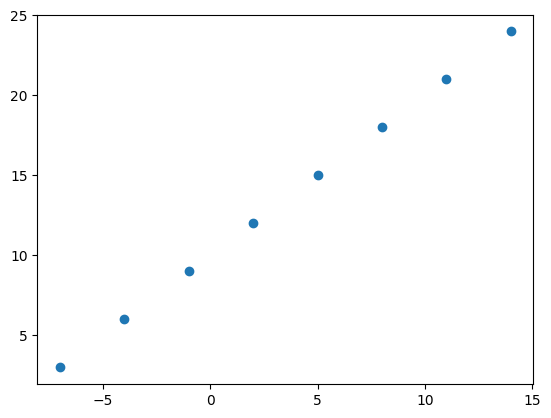

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# visuale it
plt.scatter(X, y)

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [ ]:
# create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
# turn our numpy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

## Steps in modelling with tensorflow
1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model
2. **Compiling a model** - define the loss function (the function which tells our model how wrong it is), the optimizer(tells our model how to imporve the patterns its learning) and evaluation metrics( what we can use to interprete the performance of our model)
3. **Fitting a model**- letting the model find paterns between X and y

In [ ]:
# set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the  model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 462ms/step - loss: 8.0669 - mae: 8.0669
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 7.9344 - mae: 7.9344
Epoch 3/5
1/1 [==============================] - 0s 12ms/step - loss: 7.8019 - mae: 7.8019
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 7.6694 - mae: 7.6694
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 7.5369 - mae: 7.5369


In [ ]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# make a prrediction
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 96ms/step


array([[29.414171]], dtype=float32)

## Improving our model
We can improve our model by altering the steps we took in creating it
1. **Creating a model** - Here we might add more layers, increase the number of hidden units(neurons) within each of the hidden layers, change the activtation function of each layer
2. **Compiling a model** - Here we might change the optimization function or the learning rate of the optimization function
3. **Fitting a model** - Here we might fit a model for more epochs, or on more data

In [ ]:
# Rebuild model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile
model.compile(loss=tf.keras.metrics.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# fit the model, this time train for longer
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 317ms/step - loss: 16.4419 - mae: 16.4419
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 16.1607 - mae: 16.1607
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 15.8794 - mae: 15.8794
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 15.5982 - mae: 15.5982
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 15.3169 - mae: 15.3169
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 15.0357 - mae: 15.0357
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 14.8138 - mae: 14.8138
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 14.6813 - mae: 14.6813
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 14.5488 - mae: 14.5488
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 14.4163 - mae: 14.4163
Epoch 11/100
1/1 [==============================] - 

In [ ]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# make a prediction to check
model.predict([17])

1/1 [==============================] - 0s 61ms/step


array([[29.402645]], dtype=float32)

In [ ]:
# making a few changes to the model to see if it improves
# Rebuild model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# changing the optimizer
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# fit the model, this time train for longer
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 554ms/step - loss: 13.2293 - mae: 13.2293
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 12.2913 - mae: 12.2913
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 11.3488 - mae: 11.3488
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 10.3958 - mae: 10.3958
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 9.4270 - mae: 9.4270
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 8.5195 - mae: 8.5195
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 7.7060 - mae: 7.7060
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 6.8629 - mae: 6.8629
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 5.9864 - mae: 5.9864
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 5.0760 - mae: 5.0760
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - 

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 104ms/step


array([[27.43594]], dtype=float32)

## Evaluating a model
In practice, a typical workflow in building neural networks is:
```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

When it comes to evaluation, it's a good idea to visualize
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does the model perform while it learns?
* The predictions of the model - how do the preedictions of a model line up against the ground true

In [ ]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for X
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

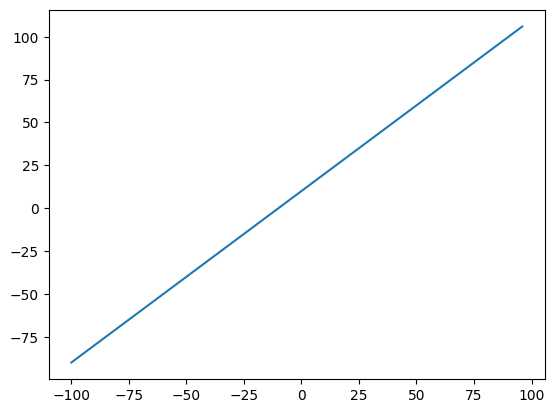

In [ ]:
# visualize the data
import matplotlib.pyplot as plt
plt.plot(X, y)

### The 3 sets...
* Training set: the model learns from this data, which is typically 70-80% of the total data available
* Validation set: the model gets tuned on this data, which is typically 10-15% of the data available
* Test set: the model gets evaluated on this data to test what it has learned, this set  is typically 10-15% of the data available

In [ ]:
# check the lenght of our samples
len(X)

50

In [ ]:
# split the data into traain and test sets
X_train = X[:40]
y_train = y[:40]
X_test = X[40:]
y_test = y[40:]
len(X_train), len(X_test)

(40, 10)

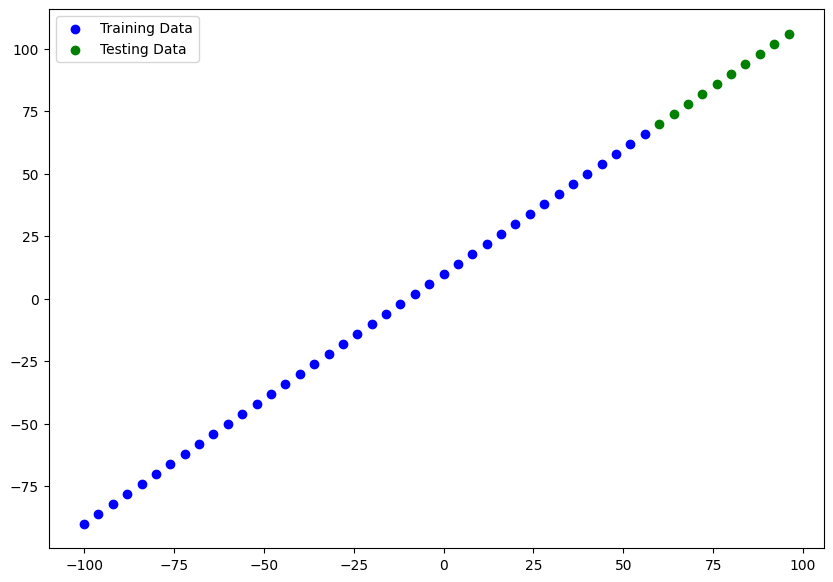

In [ ]:
# Visualizing
plt.figure(figsize=(10, 7))
# plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training Data")
# plot testing data in green
plt.scatter(X_test, y_test, c="g", label="Testing Data")
plt.legend()

In [ ]:
# building a neural network for our data
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="My_model.")

# compile
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# # fit
# model.fit(X_train, y_train, epochs=100)

## Visualizing the model

In [ ]:
# model.summary()

In [ ]:
X[0]

<tf.Tensor: shape=(), dtype=int32, numpy=-100>

In [ ]:
# create a model that builds automatically by defining the input shape argument
# in the first layer
# tf.random.set_seed(42)
# # create a model
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(1)
# ])

# model.compile(loss=tf.keras.losses.mae,
#               optimizer=tf.keras.optimizers.SGD(),
#               metrics=["mae"])
# xx = tf.ones((1, 4))
# yy = model(xx)
# # model.summary()

In [ ]:
# model.summary()

* Total params - total number of parameters in the model
* Trainable parameters - the parameters(pattern) the model can update as it trains
* Non-trainable params - these parameters aren't updated during training(this is typical when you bring in already learned patterns or parametersfrom other models during **Transfer Learning**)


In [ ]:
# fit the model with training data
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [ ]:
model.summary()

Model: "My_model."
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 100)               200       
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


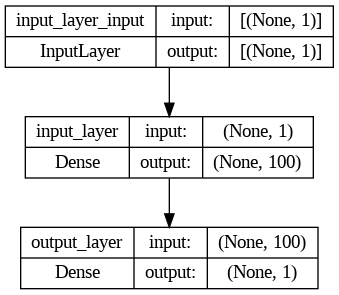

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)


## Visualizing our model's predictions
To visualize predictions, it's a good idea to plot them against the ground truth labels.
Often you'll see this  in the form of `y_test` or `y_true` versus `y_pred`

In [ ]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 48ms/step


array([[ 66.98333 ],
       [ 70.78085 ],
       [ 74.57837 ],
       [ 78.37588 ],
       [ 82.1734  ],
       [ 85.970924],
       [ 89.76844 ],
       [ 93.565956],
       [ 97.363464],
       [101.16098 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# Let's create a plotting function
def plot_prediction(predictions, train_data=X_train, train_labels=y_train,
                    test_data=X_test, test_labels=y_test):
    """
    Plots training data, test data and compares predictions to ground true
    """
    plt.figure(figsize=(10, 7))
    # ploting the training data
    plt.scatter(train_data, train_labels, c='b', label="Training data")
    # plotting the testing data
    plt.scatter(test_data, test_labels, c='g', label="Testing data")
    # plot models predictions in red
    plt.scatter(test_data, predictions, c='r', label="Predictions")
    plt.legend()

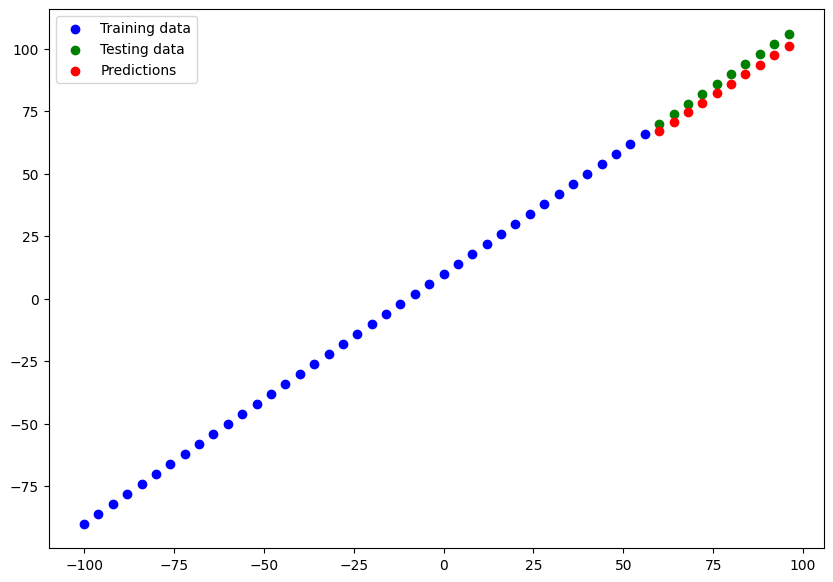

In [ ]:
plot_prediction()

### Evaluating our model's metrics with regression evaluation metrics
Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance
Since we're working on a regression problem, two of the main metrics are:
* MAE - mean absolute error
* MSE- mean square error

In [ ]:
# Evaluate teh model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 146ms/step - loss: 3.9278 - mae: 3.9278


[3.9278388023376465, 3.9278388023376465]

In [ ]:
# calculate the mean absolute error
mae = tf.losses.mean_absolute_error(y_true=y_test,
                              y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.9278405>

In [ ]:
# Calculate the mean squared error
mse = tf.losses.mean_squared_error(y_true=y_test,
                            y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=15.766176>

In [ ]:
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_true,
                                          y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true=y_true,
                                          y_pred=tf.squeeze(y_pred))

### Running experiments to improve our model
1. Get more data
2. Make your model larger(using a more complex model)
3. Train for longer

### **Build `model_1`**

In [ ]:
# set random seed
tf.random.set_seed(42)
# 1.create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile
model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 16ms/step - loss: 28.0456 - mae: 28.0456
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 8.9051 - mae: 8.9051
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 9.7717 - mae: 9.7717
Epoch 4/100
2/2 [==============================] - 0s 11ms/step - loss: 11.9443 - mae: 11.9443
Epoch 5/100
2/2 [==============================] - 0s 11ms/step - loss: 11.0085 - mae: 11.0085
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 10.1704 - mae: 10.1704
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 9.1894 - mae: 9.1894
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 9.1294 - mae: 9.1294
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 11.7344 - mae: 11.7344
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 13.6506 - mae: 13.6506
Epoch 11/100
2/2 [==============================] - 0s 10ms/step

1/1 [==============================] - 0s 46ms/step


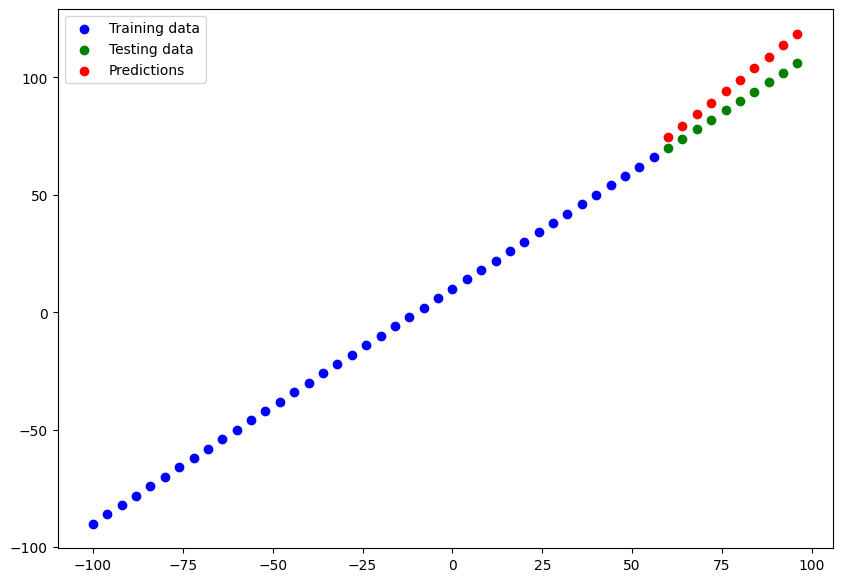

In [ ]:
# Make and plot predictions
y_preds_1 = model_1.predict(X_test)
plot_prediction(predictions=y_preds_1)

In [ ]:
# calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=8.589047>,
 <tf.Tensor: shape=(), dtype=float32, numpy=80.25698>)

**Build model_2** - 2 dense layers, trained for 100 epochs

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(40),
    tf.keras.layers.Dense(1)
])
# compile
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
# fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 54ms/step - loss: 30.9225 - mae: 30.9225
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 26.9508 - mae: 26.9508
Epoch 3/100
2/2 [==============================] - 0s 20ms/step - loss: 31.5285 - mae: 31.5285
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 15.8413 - mae: 15.8413
Epoch 5/100
2/2 [==============================] - 0s 13ms/step - loss: 22.3599 - mae: 22.3599
Epoch 6/100
2/2 [==============================] - 0s 15ms/step - loss: 12.2975 - mae: 12.2975
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 13.8703 - mae: 13.8703
Epoch 8/100
2/2 [==============================] - 0s 13ms/step - loss: 13.1581 - mae: 13.1581
Epoch 9/100
2/2 [==============================] - 0s 14ms/step - loss: 34.9362 - mae: 34.9362
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 24.2856 - mae: 24.2856
Epoch 11/100
2/2 [==============================]

1/1 [==============================] - 0s 49ms/step


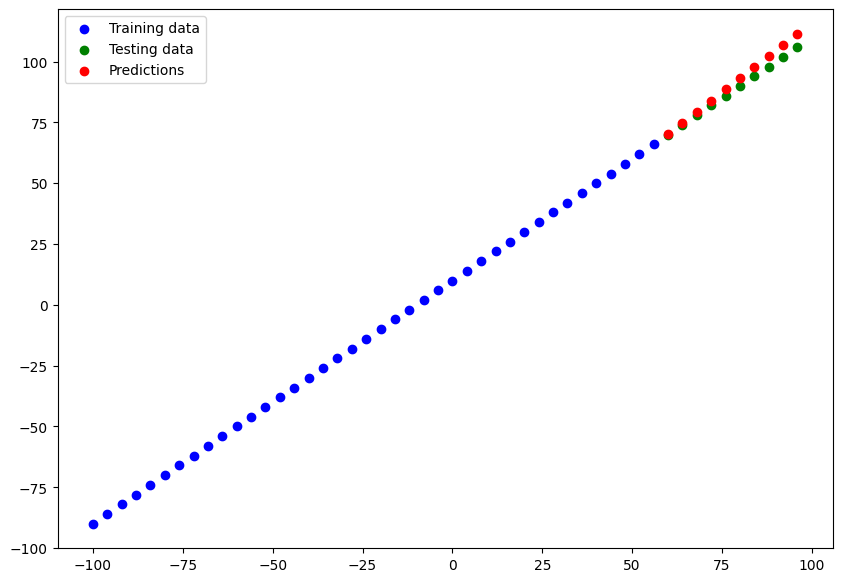

In [ ]:
y_preds_2 = model_2.predict(X_test)
plot_prediction(predictions=y_preds_2)

In [ ]:
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=2.8861878>,
 <tf.Tensor: shape=(), dtype=float32, numpy=11.045566>)

**Build model_3** - 2 layers, train for 500 epochs

In [ ]:
tf.random.set_seed(42)
# build model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# compile
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
# fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0)

1/1 [==============================] - 0s 54ms/step


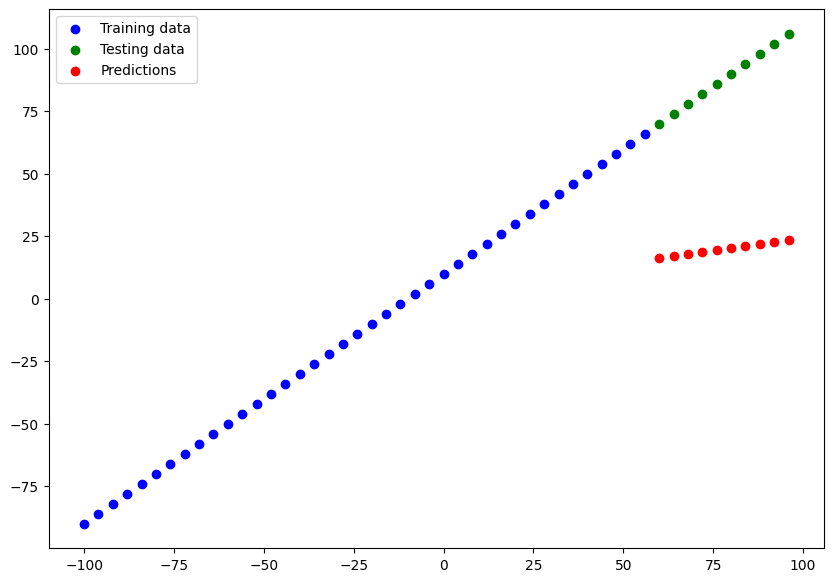

In [ ]:
y_preds_3 = model_3.predict(X_test)
plot_prediction(y_preds_3)

In [ ]:
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.13613>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4727.2954>)

## Comparing our results

In [ ]:
# compare using a pandas dataframe
import pandas as pd
model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]
results = pd.DataFrame(model_results, columns=["Model", "MAE", "MSE"])
results

,Model,MAE,MSE
0,model_1,8.589047,80.256981
1,model_2,2.886188,11.045566
2,model_3,68.136131,4727.295410


In [ ]:
model_2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 40)                80        
                                                                 
 dense_16 (Dense)            (None, 1)                 41        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Tracking your experiments
**Tools:** As you build more models, you'll want to look into
* TensorBoard
* Weights & Biases

## Saving our models
There are two main formats to save our models
1. The SavedModel format
2. The HDf5 format

In [ ]:
# save model using Savemodel format
!mkdir saved_models

In [ ]:
model_2.save("saved_models/best_model")

In [ ]:
# saving a model using hdf5
model_2.save("saved_models/hdf5_best_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Loading a saved model

In [ ]:
# load the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("saved_models/best_model")
loaded_SavedModel_format.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 40)                80        
                                                                 
 dense_16 (Dense)            (None, 1)                 41        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# load the hdf5 model
loaded_hdf5_format = tf.keras.models.load_model("saved_models/hdf5_best_model.h5")

In [ ]:
loaded_hdf5_format.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 40)                80        
                                                                 
 dense_16 (Dense)            (None, 1)                 41        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Download a model from Google Colab
1. Go to the files tab, right click on the file and select download
2. Use code (cell below)
3. Save to google drive and copy it there (2nd cell below)

In [ ]:
# download file
from google.colab import files
files.download("/content/saved_models/hdf5_best_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# save to google drive requires mounting google drive
!cp /content/saved_models/hdf5_best_model.h5 /content/drive/MyDrive/Colab_Notebooks/Models

## A larger Example

In [ ]:
# import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# read the data
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# encodeing categorical data
insurance_onehot = pd.get_dummies(insurance)

In [ ]:
insurance_onehot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [ ]:
# create X and y values
X = insurance_onehot.drop("charges", axis=1)
y = insurance_onehot["charges"]
X, y

(      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0      19  27.900         0           1         0          0           1   
 1      18  33.770         1           0         1          1           0   
 2      28  33.000         3           0         1          1           0   
 3      33  22.705         0           0         1          1           0   
 4      32  28.880         0           0         1          1           0   
 ...   ...     ...       ...         ...       ...        ...         ...   
 1333   50  30.970         3           0         1          1           0   
 1334   18  31.920         0           1         0          1           0   
 1335   18  36.850         0           1         0          1           0   
 1336   21  25.800         0           1         0          1           0   
 1337   61  29.070         0           1         0          0           1   
 
       region_northeast  region_northwest  region_southeast  region_southw

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train, X_test

(      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 836    36  31.500         0           0         1          1           0   
 621    37  34.100         4           0         1          0           1   
 867    57  43.700         1           0         1          1           0   
 633    40  22.705         2           0         1          1           0   
 790    39  41.800         0           1         0          1           0   
 ...   ...     ...       ...         ...       ...        ...         ...   
 1177   40  27.400         1           1         0          1           0   
 1281   47  27.645         2           1         0          0           1   
 421    61  35.860         0           0         1          0           1   
 1186   20  35.625         3           0         1          0           1   
 35     19  20.425         0           0         1          1           0   
 
       region_northeast  region_northwest  region_southeast  region_southw

In [ ]:
# Build a neural network
tf.random.set_seed(42)
# build model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])
# fit
insurance_model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 2s 10ms/step - loss: 13125.3643 - mae: 13125.3643
Epoch 2/100
34/34 [==============================] - 0s 6ms/step - loss: 12212.1182 - mae: 12212.1182
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 12064.7783 - mae: 12064.7783
Epoch 4/100
34/34 [==============================] - 0s 7ms/step - loss: 11989.7930 - mae: 11989.7930
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 11879.4453 - mae: 11879.4453
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 11697.3486 - mae: 11697.3486
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 11379.6904 - mae: 11379.6904
Epoch 8/100
34/34 [==============================] - 0s 8ms/step - loss: 10877.9375 - mae: 10877.9375
Epoch 9/100
34/34 [==============================] - 0s 6ms/step - loss: 10252.9033 - mae: 10252.9033
Epoch 10/100
34/34 [==============================] - 0s 6ms/step - loss: 9619.79

In [ ]:
# check the model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8721.8545 - mae: 8721.8545


[8721.8544921875, 8721.8544921875]

In [ ]:
y_train.median(), y_train.mean()

(9403.133, 13225.374713419626)

In [ ]:
# Improve the model by ading a layer and using the Adam Optimizer
tf.random.set_seed(42)
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(20),
    tf.keras.layers.Dense(1)
])
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                          metrics=["mse"])
insurance_model_2.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100, verbose=0)

In [ ]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4280.3398 - mse: 71786232.0000


[4280.33984375, 71786232.0]

In [ ]:
# Model 3: same as model 2 just train for longer
tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(20),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

history = insurance_model_3.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=300,
                      verbose=0)

In [ ]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 1s 3ms/step - loss: 3627.6895 - mae: 3627.6895


[3627.689453125, 3627.689453125]

Text(0.5, 0, 'epochs')

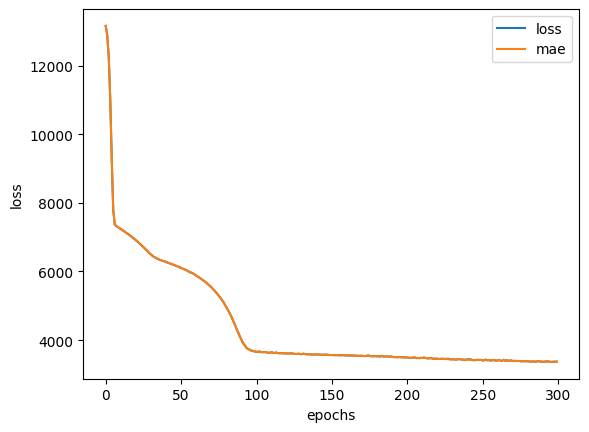

In [ ]:
# plot the history (a.k.a loss curve or training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## Preprocessing Data (Normalization and Standardization)
In terms of scaling values, neural networks tend to prefer normalization

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we need a few classes from Scikit-Learn

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # the columns to be scaled
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# create X and y values
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

# fit the column transformer to our training data
ct.fit(X_train)

# tranform training and test with normalization(MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
# What does our data look like
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [ ]:
# build a neural network to fit our preprocessed data
tf.random.set_seed(42)
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(20),
    tf.keras.layers.Dense(1)
])

# compile
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# fit the model
insurance_model_4.fit(X_train_normal, y_train,
                      epochs=300, verbose=0)

In [ ]:
insurance_model_3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 1, 100)            1200      
                                                                 
 dense_15 (Dense)            (None, 1, 20)             2020      
                                                                 
 dense_16 (Dense)            (None, 1, 1)              21        
                                                                 
Total params: 3241 (12.66 KB)
Trainable params: 3241 (12.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Evaluate our model
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 8ms/step - loss: 3161.6628 - mae: 3161.6628


[3161.662841796875, 3161.662841796875]

## Exercises

In [5]:
# 1. Create your own regression data set and fit a model
import tensorflow as tf
tf.random.set_seed(42)
X = tf.range(-150, 250)
y = 2*X + 10
X, y

(<tf.Tensor: shape=(400,), dtype=int32, numpy=
 array([-150, -149, -148, -147, -146, -145, -144, -143, -142, -141, -140,
        -139, -138, -137, -136, -135, -134, -133, -132, -131, -130, -129,
        -128, -127, -126, -125, -124, -123, -122, -121, -120, -119, -118,
        -117, -116, -115, -114, -113, -112, -111, -110, -109, -108, -107,
        -106, -105, -104, -103, -102, -101, -100,  -99,  -98,  -97,  -96,
         -95,  -94,  -93,  -92,  -91,  -90,  -89,  -88,  -87,  -86,  -85,
         -84,  -83,  -82,  -81,  -80,  -79,  -78,  -77,  -76,  -75,  -74,
         -73,  -72,  -71,  -70,  -69,  -68,  -67,  -66,  -65,  -64,  -63,
         -62,  -61,  -60,  -59,  -58,  -57,  -56,  -55,  -54,  -53,  -52,
         -51,  -50,  -49,  -48,  -47,  -46,  -45,  -44,  -43,  -42,  -41,
         -40,  -39,  -38,  -37,  -36,  -35,  -34,  -33,  -32,  -31,  -30,
         -29,  -28,  -27,  -26,  -25,  -24,  -23,  -22,  -21,  -20,  -19,
         -18,  -17,  -16,  -15,  -14,  -13,  -12,  -11,  -10,   -

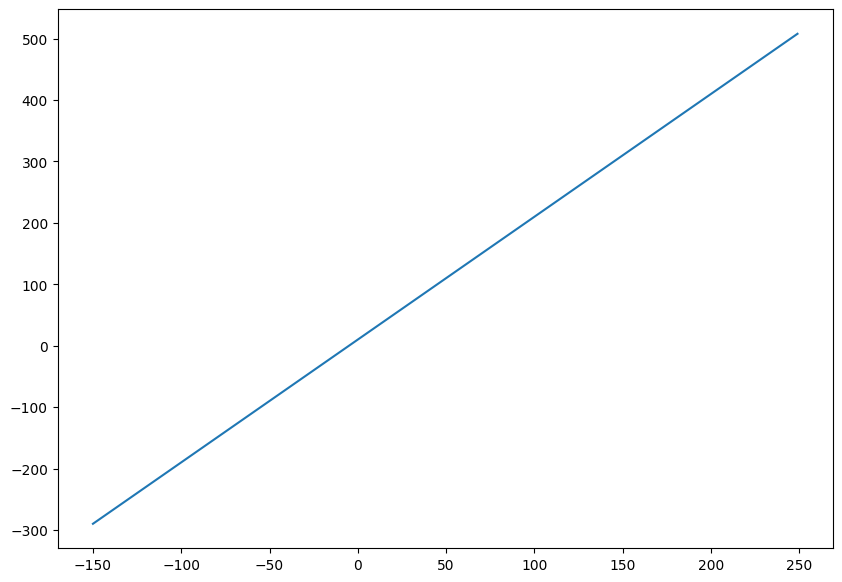

In [6]:
# plot the data
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.plot(X, y)

In [8]:
# split the data into training and test sets
X_train = X[:300]
X_test = X[300:]
y_train = y[:300]
y_test = y[300:]

len(X_train), len(X_test)

(300, 100)

In [48]:
# create our model with 4 hidden layers
linear_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    # tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
], name="Linear_Model")

# compile the model
linear_model.compile(loss=tf.keras.losses.mae,
                     optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                     metrics=["mae"])

# fit the model
linear_model.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=200,
                 verbose=1)

Epoch 1/200
10/10 [==============================] - 1s 4ms/step - loss: 134.3831 - mae: 134.3831
Epoch 2/200
10/10 [==============================] - 0s 3ms/step - loss: 32.2925 - mae: 32.2925
Epoch 3/200
10/10 [==============================] - 0s 4ms/step - loss: 17.9113 - mae: 17.9113
Epoch 4/200
10/10 [==============================] - 0s 5ms/step - loss: 11.8290 - mae: 11.8290
Epoch 5/200
10/10 [==============================] - 0s 4ms/step - loss: 7.5851 - mae: 7.5851
Epoch 6/200
10/10 [==============================] - 0s 4ms/step - loss: 6.5261 - mae: 6.5261
Epoch 7/200
10/10 [==============================] - 0s 4ms/step - loss: 4.8684 - mae: 4.8684
Epoch 8/200
10/10 [==============================] - 0s 4ms/step - loss: 3.8195 - mae: 3.8195
Epoch 9/200
10/10 [==============================] - 0s 5ms/step - loss: 2.7808 - mae: 2.7808
Epoch 10/200
10/10 [==============================] - 0s 4ms/step - loss: 1.7486 - mae: 1.7486
Epoch 11/200
10/10 [=============================

In [49]:
linear_model.summary()

Model: "Linear_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_61 (Dense)            (None, 10)                20        
                                                                 
 dense_62 (Dense)            (None, 10)                110       
                                                                 
 dense_63 (Dense)            (None, 1)                 11        
                                                                 
Total params: 141 (564.00 Byte)
Trainable params: 141 (564.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
# function to plot our model's predictions against true value
def plot_predictions(predictions, train_data=X_train, train_labels=y_train,
                    test_data=X_test, test_labels=y_test):
    """
    Plots training data, test data and compares predictions to ground true
    """
    plt.figure(figsize=(10, 7))
    # ploting the training data
    plt.plot(train_data, train_labels, c='b', label="Training data")
    # plotting the testing data
    plt.plot(test_data, test_labels, c='g', label="Testing data")
    # plot models predictions in red
    plt.plot(test_data, predictions, c='r', label="Predictions")
    plt.legend()

4/4 [==============================] - 0s 7ms/step


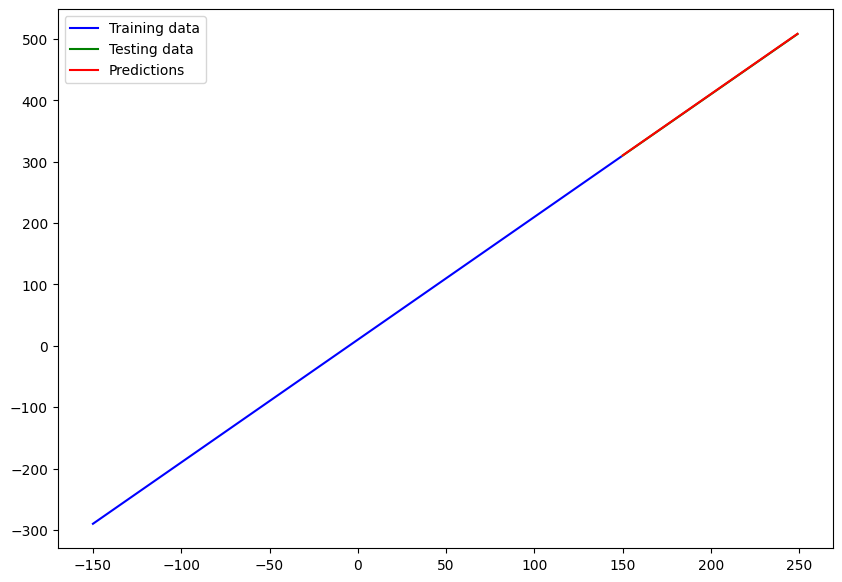

In [54]:
# evaluate the model's performance
y_preds = linear_model.predict(X_test)
plot_predictions(predictions=y_preds)

In [52]:
# Evaluate model
linear_model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 5ms/step - loss: 0.3705 - mae: 0.3705


[0.37051087617874146, 0.37051087617874146]

In [60]:
linear_model.predict([200])

1/1 [==============================] - 0s 283ms/step


array([[410.37146]], dtype=float32)

Model seems to be doing pretty well

In [62]:
# Modelling with the Boston pricing Dataset
X, y = tf.keras.datasets.boston_housing.load_data(
    path="/content/drive/MyDrive/Colab_Notebooks/boston_housing.npz",
    test_split=0.2,
    seed=42
)

In [63]:
X

(array([[9.1780e-02, 0.0000e+00, 4.0500e+00, ..., 1.6600e+01, 3.9550e+02,
         9.0400e+00],
        [5.6440e-02, 4.0000e+01, 6.4100e+00, ..., 1.7600e+01, 3.9690e+02,
         3.5300e+00],
        [1.0574e-01, 0.0000e+00, 2.7740e+01, ..., 2.0100e+01, 3.9011e+02,
         1.8070e+01],
        ...,
        [3.0410e-02, 0.0000e+00, 5.1900e+00, ..., 2.0200e+01, 3.9481e+02,
         1.0560e+01],
        [5.2058e-01, 0.0000e+00, 6.2000e+00, ..., 1.7400e+01, 3.8845e+02,
         9.5400e+00],
        [2.5199e-01, 0.0000e+00, 1.0590e+01, ..., 1.8600e+01, 3.8943e+02,
         1.8060e+01]]),
 array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8, 21.5,
        18.9,  7. , 21.2, 18.5, 29.8, 18.8, 10.2, 50. , 14.1, 25.2, 29.1,
        12.7, 22.4, 14.2, 13.8, 20.3, 14.9, 21.7, 18.3, 23.1, 23.8, 15. ,
        20.8, 19.1, 19.4, 34.7, 19.5, 24.4, 23.4, 19.7, 28.2, 50. , 17.4,
        22.6, 15.1, 13.1, 24.2, 19.9, 24. , 18.9, 35.4, 15.2, 26.5, 43.5,
        21.2, 18.4, 28.5, 23.9, 18.5, 2

In [65]:
X[1].shape

(404,)

In [70]:
X_train = X[0]
y_train = X[1]
X_test = y[0]
y_test = y[1]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [71]:
# Create the model
boston_model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="relu")
])

# compile
boston_model.compile(loss="mae", optimizer="adam", metrics=["mae"])

# fit the model
boston_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
13/13 [==============================] - 1s 4ms/step - loss: 30.5152 - mae: 30.5152
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 13.1662 - mae: 13.1662
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 8.2214 - mae: 8.2214
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 5.8759 - mae: 5.8759
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 5.5813 - mae: 5.5813
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 5.3851 - mae: 5.3851
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 5.2151 - mae: 5.2151
Epoch 8/100
13/13 [==============================] - 0s 5ms/step - loss: 5.2313 - mae: 5.2313
Epoch 9/100
13/13 [==============================] - 0s 4ms/step - loss: 5.1798 - mae: 5.1798
Epoch 10/100
13/13 [==============================] - 0s 3ms/step - loss: 5.0986 - mae: 5.0986
Epoch 11/100
13/13 [==============================] - 0

In [77]:
y_preds = boston_model.predict(X_test)
y_preds

4/4 [==============================] - 0s 5ms/step


array([[19.342703 ],
       [24.130367 ],
       [16.682468 ],
       [23.054533 ],
       [19.632593 ],
       [16.791014 ],
       [24.404121 ],
       [22.741592 ],
       [22.42573  ],
       [25.64317  ],
       [24.758406 ],
       [23.19781  ],
       [24.927523 ],
       [11.580988 ],
       [22.68615  ],
       [22.556528 ],
       [35.662594 ],
       [17.404856 ],
       [24.173956 ],
       [12.316362 ],
       [27.934431 ],
       [13.08174  ],
       [17.751965 ],
       [18.829657 ],
       [11.4634495],
       [25.468184 ],
       [21.662703 ],
       [ 6.268831 ],
       [12.366507 ],
       [30.540195 ],
       [10.56648  ],
       [15.757949 ],
       [28.386656 ],
       [22.675676 ],
       [13.868207 ],
       [27.482445 ],
       [19.59051  ],
       [33.095486 ],
       [20.604465 ],
       [21.639252 ],
       [20.705341 ],
       [33.287903 ],
       [ 9.471615 ],
       [29.619926 ],
       [22.366488 ],
       [19.870691 ],
       [19.813402 ],
       [ 8.24

In [79]:
boston_model.evaluate(X_test, y_test)

4/4 [==============================] - 1s 9ms/step - loss: 4.4501 - mae: 4.4501


[4.450089454650879, 4.450089454650879]

In [83]:
# create new model
boston_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(1, activation="relu")
])

# compile
boston_model_2.compile(loss="mae", metrics=["mae"],
                     optimizer=tf.optimizers.Adam(learning_rate=0.01))

# fit the model
boston_model_2.fit(X_train, y_train, epochs=200)

Epoch 1/200
13/13 [==============================] - 2s 4ms/step - loss: 8.9324 - mae: 8.9324
Epoch 2/200
13/13 [==============================] - 0s 3ms/step - loss: 6.1367 - mae: 6.1367
Epoch 3/200
13/13 [==============================] - 0s 4ms/step - loss: 5.8283 - mae: 5.8283
Epoch 4/200
13/13 [==============================] - 0s 3ms/step - loss: 5.6823 - mae: 5.6823
Epoch 5/200
13/13 [==============================] - 0s 5ms/step - loss: 5.2656 - mae: 5.2656
Epoch 6/200
13/13 [==============================] - 0s 4ms/step - loss: 5.4279 - mae: 5.4279
Epoch 7/200
13/13 [==============================] - 0s 4ms/step - loss: 4.9073 - mae: 4.9073
Epoch 8/200
13/13 [==============================] - 0s 4ms/step - loss: 4.6803 - mae: 4.6803
Epoch 9/200
13/13 [==============================] - 0s 7ms/step - loss: 5.4804 - mae: 5.4804
Epoch 10/200
13/13 [==============================] - 0s 7ms/step - loss: 4.7727 - mae: 4.7727
Epoch 11/200
13/13 [==============================] - 0s 8m

In [84]:
boston_model_2.evaluate(X_test, y_test)

4/4 [==============================] - 0s 6ms/step - loss: 2.8329 - mae: 2.8329


[2.832879066467285, 2.832879066467285]

In [86]:
# third model
boston_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1, activation="relu")
])

# compile
boston_model_3.compile(loss="mae", metrics=["mae"],
                     optimizer=tf.optimizers.Adam(learning_rate=0.01))

# fit the model
boston_model_3.fit(X_train, y_train, epochs=300)

Epoch 1/300
13/13 [==============================] - 3s 7ms/step - loss: 31.3972 - mae: 31.3972
Epoch 2/300
13/13 [==============================] - 0s 7ms/step - loss: 22.5057 - mae: 22.5057
Epoch 3/300
13/13 [==============================] - 0s 6ms/step - loss: 22.5057 - mae: 22.5057
Epoch 4/300
13/13 [==============================] - 0s 4ms/step - loss: 22.5057 - mae: 22.5057
Epoch 5/300
13/13 [==============================] - 0s 6ms/step - loss: 22.5057 - mae: 22.5057
Epoch 6/300
13/13 [==============================] - 0s 8ms/step - loss: 22.5057 - mae: 22.5057
Epoch 7/300
13/13 [==============================] - 0s 11ms/step - loss: 22.5057 - mae: 22.5057
Epoch 8/300
13/13 [==============================] - 0s 7ms/step - loss: 22.5057 - mae: 22.5057
Epoch 9/300
13/13 [==============================] - 0s 7ms/step - loss: 22.5057 - mae: 22.5057
Epoch 10/300
13/13 [==============================] - 0s 7ms/step - loss: 22.5057 - mae: 22.5057
Epoch 11/300
13/13 [==================

My best model seems to be `boston_model_2`.

In [88]:
boston_model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 50)                700       
                                                                 
 dense_81 (Dense)            (None, 20)                1020      
                                                                 
 dense_82 (Dense)            (None, 20)                420       
                                                                 
 dense_83 (Dense)            (None, 1)                 21        
                                                                 
Total params: 2161 (8.44 KB)
Trainable params: 2161 (8.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [89]:
# saving my model
boston_model_2.save("saved_models/boston_pricing_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
